# !!! CHANGE KERNEL TO -> testing_model_env

# Testing Model

In [1]:
# import all libraries
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image

## Time taken to train models


In [2]:
# read log json files
f = open('log_gpu.json',)
log_gpu = json.load(f)
f.close()



print(log_gpu.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'time_to_train_gpu'])


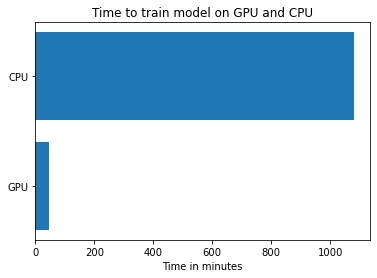

CPU -> 1081.0 minutes
GPU -> 45.29 minutes


In [3]:
# Plot
# GPU
gpu_training_time = log_gpu['time_to_train_gpu']

#CPU
# time taken for 1 epoch on cpu
one_epoch_on_cpu = 2162
# time taken for 50 epochs on cpu
cpu_training_time = one_epoch_on_cpu * 30


# convert to minutes
gpu_training_time = round(gpu_training_time/60, 2)
cpu_training_time = round(cpu_training_time/60, 2)

x = ['GPU', 'CPU']
y = [gpu_training_time, cpu_training_time]

plt.barh(x, y)
plt.xlabel("Time in minutes")
plt.title("Time to train model on GPU and CPU")

# plt.savefig('time_to_train.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'CPU -> {cpu_training_time} minutes')
print(f'GPU -> {gpu_training_time} minutes')

## Testing Model Against Testing Set
There are 1000 test images for both cat and dog class. The label for cat is 0 and dog is 1. If a model predicts 1000 cat images as 0 then the accuracy is 100% and the same for dog.

In [10]:
# Accuracy will be total images flagged as the correct folder type / total images in the folder

# Testing accuracy for cat images
total_images = 0
images_correctly_labelled = 0
true_label = 0

# load the model
model = keras.models.load_model('models/trained_model_gpu.h5')

cats_test_dir = '/Users/veersingh/Desktop/cats_dogs/test/cat'
for filename in os.listdir(cats_test_dir):
    total_images = total_images + 1
    
    current_image_file_path = cats_test_dir + '/' + filename
    
    current_image = image.load_img(current_image_file_path,
                                   target_size=(100, 100),
                                   color_mode='rgb')

    Y = image.img_to_array(current_image)
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    
    if val == true_label:
        images_correctly_labelled = images_correctly_labelled + 1

print(f'Total images --> {total_images}')
print(f'Images correctly labelled --> {images_correctly_labelled}')

print(f'\nAccuracy for class CAT--> {images_correctly_labelled/total_images*100}%')

2021-10-13 12:07:24.968106: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-13 12:07:25.159675: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Total images --> 1000
Images correctly labelled --> 711

Accuracy for class CAT--> 71.1%


In [11]:
# Accuracy will be total images flagged as the correct folder type / total images in the folder

# Testing accuracy for dog images
total_images = 0
images_correctly_labelled = 0
true_label = 1

# load the model
model = keras.models.load_model('models/trained_model_gpu.h5')

dogs_test_dir = '/Users/veersingh/Desktop/cats_dogs/test/dog'
for filename in os.listdir(dogs_test_dir):
    total_images = total_images + 1
    
    current_image_file_path = dogs_test_dir + '/' + filename
    
    current_image = image.load_img(current_image_file_path,
                                   target_size=(100, 100),
                                   color_mode='rgb')

    Y = image.img_to_array(current_image)
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    
    if val == true_label:
        images_correctly_labelled = images_correctly_labelled + 1

print(f'Total images --> {total_images}')
print(f'Images correctly labelled --> {images_correctly_labelled}')

print(f'\nAccuracy for class DOG--> {images_correctly_labelled/total_images*100}%')

Total images --> 1000
Images correctly labelled --> 875

Accuracy for class DOG--> 87.5%


## Conclusion

Dont train on CPU. The results are good.